In [1]:
print("Hello")

Hello


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset
# seaborn has inbuilt datasets that you can work with
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
# to load the dataset we use load_dataset() function
df = sns.load_dataset("titanic")

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# embarked, class, who, adult_male,alive,alone
df.drop(columns=["class","who","adult_male","alive","alone"], inplace=True)

In [7]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town
0,0,3,male,22.0,1,0,7.2500,S,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg


In [8]:
df.shape

(891, 10)

In [9]:
# detect missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
deck           688
embark_town      2
dtype: int64

In [10]:
df.drop(columns=["embarked","deck"],inplace=True)

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,71.2833,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Southampton
3,1,1,female,35.0,1,0,53.1000,Southampton
4,0,3,male,35.0,0,0,8.0500,Southampton


In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      2
dtype: int64

In [13]:
# we use mode to fill missing values in embark_town
mode = df["embark_town"].mode()[0]

In [14]:
df["embark_town"]=df["embark_town"].fillna(mode)

In [15]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      0
dtype: int64

<Axes: ylabel='age'>

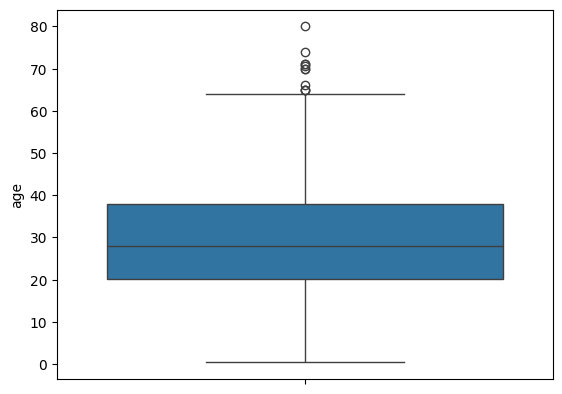

In [16]:
# we use nned to check for outliers in age column to decide whether to use mean or median
sns.boxplot(df["age"])

In [17]:
# fix the missing values using median
median = df["age"].median()
df["age"]=df["age"].fillna(median)


In [18]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
q1=df.describe()["age"]["25%"]
q3=df.describe()["age"]["75%"]
IQR = q3-q1

lower_limit = q1-1.5*IQR
upper_limit = q3 + 1.5 *IQR

df["age"]=df["age"].clip(lower_limit,upper_limit)

In [20]:
upper_limit

np.float64(54.5)

In [21]:
lower_limit

np.float64(2.5)

In [22]:
q1

np.float64(22.0)

In [23]:
q3

np.float64(35.0)

In [24]:
IQR

np.float64(13.0)

<Axes: ylabel='age'>

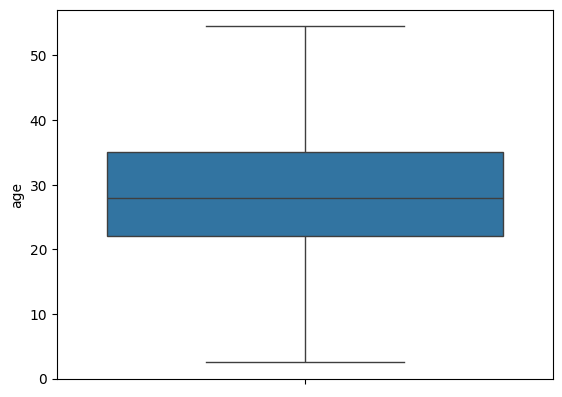

In [25]:
sns.boxplot(df["age"])

In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,71.2833,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Southampton
3,1,1,female,35.0,1,0,53.1000,Southampton
4,0,3,male,35.0,0,0,8.0500,Southampton


In [27]:
# encoding
# sex - nominal
# embark_town = nominal column
df["sex"].value_counts() # sex_male, sex_female, drop_first = True, onehot encoding
# map here - 1 and 0
d = {"male":1, "female":0}

In [28]:
df["sex"]=df["sex"].map(d)

In [29]:
df["embark_town"].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [30]:
df = pd.get_dummies(df, columns=["embark_town"], drop_first=True,dtype="int64")

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [32]:
# split the data into 80 and 20
X= df.drop(columns="survived")
y=df["survived"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)

In [33]:
# Model Training
# X_train,y_train - training - fit
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)



DecisionTreeClassifier()

In [34]:
# plot_tree(model)

In [35]:
# Model testing
# X_test - testing - predict
y_pred=model.predict(X_test)

In [36]:
# y_pred will be compared with y_test to check the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score,recall_score, classification_report

In [37]:
confusion_matrix(y_pred,y_test)

array([[88, 19],
       [17, 55]])

In [38]:
df["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       107
           1       0.74      0.76      0.75        72

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [40]:
accuracy_score(y_pred,y_test)

0.7988826815642458

In [41]:
# let's train logistic regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred1 = model1.predict(X_test)

In [43]:
accuracy_score(y_pred1,y_test)

0.7988826815642458

In [44]:
# joblib - converts your model into binary format - searalization
import joblib
joblib.dump(model,"decision_tree.pkl")

['decision_tree.pkl']

In [45]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [47]:
%%capture
! pip install gradio
# array[1]

In [48]:
import gradio as gr

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
def passenger_survival_predictor(pclass,sex,age,sibsp,parch,fare,embark_town_Queenstown,embark_town_Southampton):
    result=model.predict([[pclass,sex,age,sibsp,parch,fare,embark_town_Queenstown,embark_town_Southampton]])[0]
    return "survived" if result ==1 else "not survived"

In [50]:
app=gr.Interface(fn=passenger_survival_predictor,inputs=["number","number","number","number",
                                                     "number","number","number","number"], outputs = "text" )

In [51]:
app.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://4d52e349070fcdaf3a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
